In [2]:
import kagglehub
import pandas as pd
path = kagglehub.dataset_download("fedesoriano/company-bankruptcy-prediction")
data = pd.read_csv(path+"/data.csv")

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


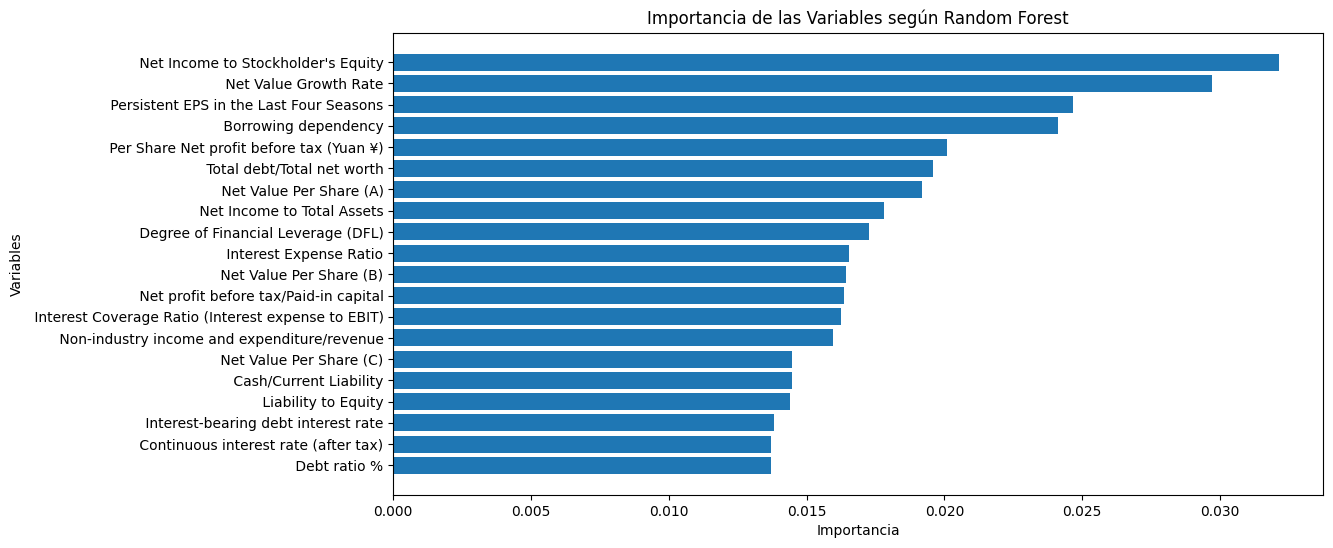

In [4]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Separar variables predictoras y objetivo
X = data.drop(columns=["Bankrupt?"])  # Variables predictoras
y = data["Bankrupt?"]  # Variable objetivo (clasificación)

# Modelo de Random Forest para clasificación
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X, y)

# Obtener importancia de variables
importancias = modelo.feature_importances_

# Crear DataFrame con los resultados
feature_importance_df = pd.DataFrame({"Variable": X.columns, "Importancia": importancias})
feature_importance_df = feature_importance_df.sort_values(by="Importancia", ascending=False)

# Graficar las 20 variables más importantes
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df["Variable"][:20], feature_importance_df["Importancia"][:20])
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.title("Importancia de las Variables según Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [5]:
feature_importance_df["Variable"][:20]
# Obtener solo los nombres de las variables (índice)
nombres_top_20_variables = feature_importance_df["Variable"][:20].tolist()

print("Nombres de las 20 variables más importantes:")
print(nombres_top_20_variables)


Nombres de las 20 variables más importantes:
[" Net Income to Stockholder's Equity", ' Net Value Growth Rate', ' Persistent EPS in the Last Four Seasons', ' Borrowing dependency', ' Per Share Net profit before tax (Yuan ¥)', ' Total debt/Total net worth', ' Net Value Per Share (A)', ' Net Income to Total Assets', ' Degree of Financial Leverage (DFL)', ' Interest Expense Ratio', ' Net Value Per Share (B)', ' Net profit before tax/Paid-in capital', ' Interest Coverage Ratio (Interest expense to EBIT)', ' Non-industry income and expenditure/revenue', ' Net Value Per Share (C)', ' Cash/Current Liability', ' Liability to Equity', ' Interest-bearing debt interest rate', ' Continuous interest rate (after tax)', ' Debt ratio %']


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calcular matriz de correlación
corr_matrix = data.corr(method='pearson')  # También puedes usar 'spearman' o 'kendall'
target_corr = corr_matrix['Bankrupt?'].sort_values(ascending=False)

# Eliminar la autocorrelación de la variable consigo misma
target_corr = target_corr.drop('Bankrupt?')

In [7]:
umbral = 0.15  # Puedes ajustar este valor según tu criterio
variables_determinantes_15 = target_corr[abs(target_corr) > umbral]

# Crear una lista vacía y agregar los nombres de las variables a ella
nombres_variables_determinantes = []

# Agregar los nombres a la lista
for variable in variables_determinantes_15.index:
    nombres_variables_determinantes.append(variable)

print("Nombres de las variables más determinantes:")
print(nombres_variables_determinantes)


Nombres de las variables más determinantes:
[' Debt ratio %', ' Current Liability to Assets', ' Borrowing dependency', ' Current Liability to Current Assets', ' Liability to Equity', ' Current Liabilities/Equity', ' Current Liability to Equity', ' Net Value Per Share (C)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', " Net Income to Stockholder's Equity", ' Working Capital to Total Assets', ' Per Share Net profit before tax (Yuan ¥)', ' Net profit before tax/Paid-in capital', ' Retained Earnings to Total Assets', ' Persistent EPS in the Last Four Seasons', ' Net worth/Assets', ' ROA(C) before interest and depreciation before interest', ' ROA(B) before interest and depreciation after tax', ' ROA(A) before interest and % after tax', ' Net Income to Total Assets']


In [8]:
# Convertir las listas a conjuntos para facilitar la comparación
set_top_20 = set(nombres_top_20_variables)
set_determinantes = set(nombres_variables_determinantes)

# Variables comunes entre ambas listas
comunes = set_top_20.intersection(set_determinantes)

# Mostrar los resultados
print("Variables comunes en ambas listas:")
print(comunes)




Variables comunes en ambas listas:
{' Net Value Per Share (A)', ' Liability to Equity', " Net Income to Stockholder's Equity", ' Per Share Net profit before tax (Yuan ¥)', ' Borrowing dependency', ' Debt ratio %', ' Persistent EPS in the Last Four Seasons', ' Net Value Per Share (C)', ' Net Income to Total Assets', ' Net profit before tax/Paid-in capital', ' Net Value Per Share (B)'}


In [10]:
# Agregar 'Bankrupt?' a la lista de variables comunes
variables_comunes = list(comunes)  # Aseguramos que sea una lista
variables_comunes.append('Bankrupt?')  # Agregamos la variable objetivo

# Calcular la correlación de 'Bankrupt?' con las variables comunes
correlacion_bankrupt = data[variables_comunes].corr()['Bankrupt?'].drop('Bankrupt?')

# Mostrar los resultados
print("Correlación de 'Bankrupt?' con las variables comunes:")
print(correlacion_bankrupt)


Correlación de 'Bankrupt?' con las variables comunes:
Net Value Per Share (A)                    -0.165465
Liability to Equity                         0.166812
Net Income to Stockholder's Equity         -0.180987
Per Share Net profit before tax (Yuan ¥)   -0.201395
Borrowing dependency                        0.176543
Debt ratio %                                0.250161
Persistent EPS in the Last Four Seasons    -0.219560
Net Value Per Share (C)                    -0.164784
Net Income to Total Assets                 -0.315457
Net profit before tax/Paid-in capital      -0.207857
Net Value Per Share (B)                    -0.165399
Name: Bankrupt?, dtype: float64


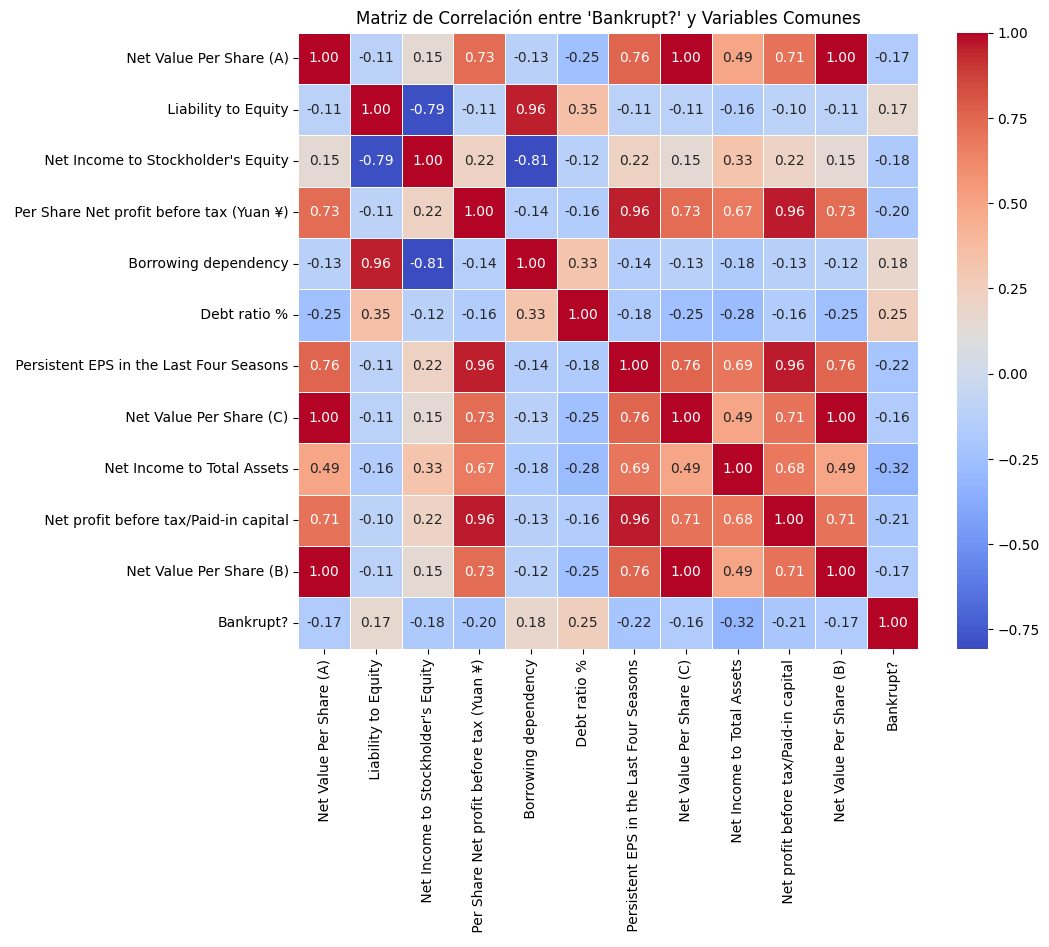

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las variables comunes más 'Bankrupt?' del DataFrame
datos_filtrados = data[list(comunes) + ['Bankrupt?']]

# Calcular la matriz de correlación
correlacion_matriz = datos_filtrados.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))  # Ajustar el tamaño según la cantidad de variables
sns.heatmap(correlacion_matriz, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Configurar el título
plt.title("Matriz de Correlación entre 'Bankrupt?' y Variables Comunes")
plt.show()



In [17]:
comunes.remove(" Net Value Per Share (B)")
comunes.remove(" Net Value Per Share (C)")


In [20]:
comunes.remove(" Per Share Net profit before tax (Yuan ¥)")
comunes.remove(" Net profit before tax/Paid-in capital")


In [ ]:


comunes.remove("Borrowing dependency")


KeyError: 'Borrowing dependency'

In [28]:
comunes.remove(" Liability to Equity")

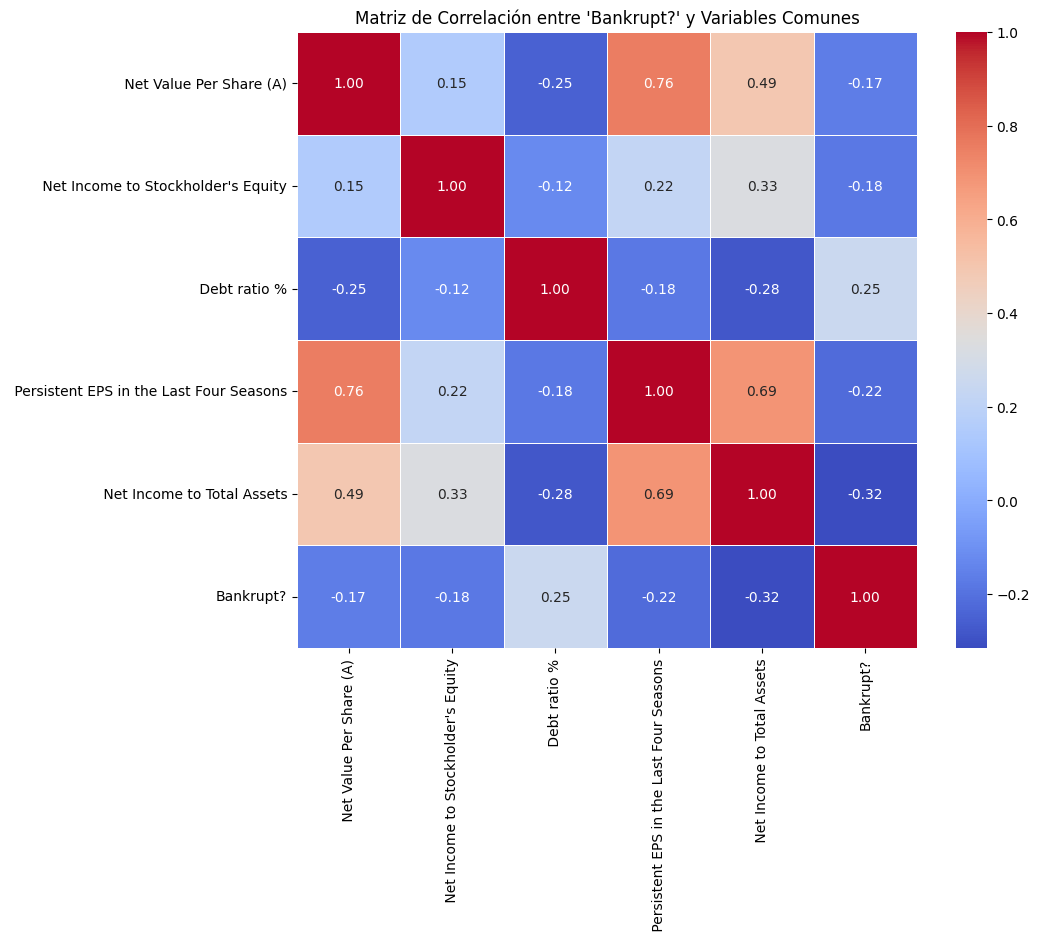

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las variables comunes más 'Bankrupt?' del DataFrame
datos_filtrados = data[list(comunes) + ['Bankrupt?']]

# Calcular la matriz de correlación
correlacion_matriz = datos_filtrados.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))  # Ajustar el tamaño según la cantidad de variables
sns.heatmap(correlacion_matriz, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Configurar el título
plt.title("Matriz de Correlación entre 'Bankrupt?' y Variables Comunes")
plt.show()


In [30]:
comunes

{' Debt ratio %',
 " Net Income to Stockholder's Equity",
 ' Net Income to Total Assets',
 ' Net Value Per Share (A)',
 ' Persistent EPS in the Last Four Seasons'}

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 1️⃣ Seleccionar variables predictoras y variable objetivo
comunes = list(comunes)  # Convertimos el set a lista
X = data[comunes]  # Ahora sí funciona
y = data["Bankrupt?"]  # Variable objetivo

# 2️⃣ Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Escalar los datos (SVM es sensible a la escala)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4️⃣ Entrenar el modelo SVM con kernel lineal
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 5️⃣ Hacer predicciones
y_pred = svm_model.predict(X_test_scaled)

# 6️⃣ Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM: {accuracy:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo SVM: 0.9685

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       1.00      0.02      0.04        44

    accuracy                           0.97      1364
   macro avg       0.98      0.51      0.51      1364
weighted avg       0.97      0.97      0.95      1364



In [34]:
from sklearn.metrics import confusion_matrix

# 6️⃣ Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM: {accuracy:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# 7️⃣ Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)


Precisión del modelo SVM: 0.9685

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       1.00      0.02      0.04        44

    accuracy                           0.97      1364
   macro avg       0.98      0.51      0.51      1364
weighted avg       0.97      0.97      0.95      1364


Matriz de confusión:
[[1320    0]
 [  43    1]]


In [35]:
# Contar la cantidad de 0s y 1s en la columna 'Bankrupt?'
counts = data["Bankrupt?"].value_counts()
print(counts)


Bankrupt?
0    6599
1     220
Name: count, dtype: int64


In [36]:
# Filtrar los primeros 400 registros con valor 0 y los primeros 200 registros con valor 1
df_0 = data[data["Bankrupt?"] == 0].head(400)
df_1 = data[data["Bankrupt?"] == 1].head(200)

# Concatenar ambos subconjuntos (manteniendo todas las columnas de 'data')
df_subset = pd.concat([df_0, df_1])

# Reiniciar el índice del DataFrame resultante
df_subset = df_subset.reset_index(drop=True)

# Verificar el nuevo DataFrame
print(df_subset)


     Bankrupt?   ROA(C) before interest and depreciation before interest  \
0            0                                           0.390923          
1            0                                           0.508361          
2            0                                           0.488519          
3            0                                           0.495686          
4            0                                           0.482475          
..         ...                                                ...          
595          1                                           0.388193          
596          1                                           0.467021          
597          1                                           0.437089          
598          1                                           0.449276          
599          1                                           0.299810          

      ROA(A) before interest and % after tax  \
0                                   0.4

In [37]:
# 1️⃣ Seleccionar variables predictoras y variable objetivo
comunes = list(comunes)  # Convertimos el set a lista
X = df_subset[comunes]  # Ahora sí funciona
y = df_subset["Bankrupt?"]  # Variable objetivo

# 2️⃣ Dividir en conjunto de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Escalar los datos (SVM es sensible a la escala)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4️⃣ Entrenar el modelo SVM con kernel lineal
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# 5️⃣ Hacer predicciones
y_pred = svm_model.predict(X_test_scaled)

# 6️⃣ Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo SVM: {accuracy:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# 7️⃣ Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)


Precisión del modelo SVM: 0.8583

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        80
           1       0.83      0.72      0.77        40

    accuracy                           0.86       120
   macro avg       0.85      0.82      0.84       120
weighted avg       0.86      0.86      0.86       120


Matriz de confusión:
[[74  6]
 [11 29]]
